In [85]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [86]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [87]:
NUM_CLASSES = 4

# Dataset reading

In [88]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [89]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [91]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [92]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_14 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,114 (4.35 KB)

 Trainable params: 1,114 (4.35 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [94]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [95]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 10s 479ms/step - accuracy: 0.4297 - loss: 1.1930
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5036 - loss: 1.1258 - val_accuracy: 0.5948 - val_loss: 0.8736
Epoch 2/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7109 - loss: 0.8634
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6709 - loss: 0.8503 - val_accuracy: 0.8464 - val_loss: 0.5848
Epoch 3/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7656 - loss: 0.6928
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7551 - loss: 0.6597 - val_accuracy: 1.0000 - val_loss: 0.3609
Epoch 4/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8125 - loss: 0.4817
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8146 - loss: 0.4865 - val_accuracy: 1.0000 - val_loss: 0.2320
Epoch 5/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7969 - loss: 0.4605
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8447 - loss: 0.3944 - val_accuracy: 1.0000 - val_loss: 0.1504
Epoch 6/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.3739
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8786 - loss: 0.3192 - val_accuracy: 1.0000 - val_loss: 0.0987
Epoch 7/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9062 - loss: 0.2701
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8990 - loss: 0.2693 - val_accuracy: 1.0000 - val_loss: 0.0696
Epoch 8/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9297 - loss: 0.1887
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9272 - loss: 0.2168 - val_accuracy: 1.0000 - val_loss: 0.0504
Epoch 9/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9453 - loss: 0.1996
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9293 - loss: 0.2034 - val_accuracy: 1.0000 - val_loss: 0.0368
Epoch 10/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9219 - loss: 0.2125
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9297 - loss: 0.1964 - val_accuracy: 1.0000 - val_loss: 0.0276
Epoch 11/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.1805
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.1780 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 12/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9375 - loss: 0.1842
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9367 - loss: 0.1854 - val_accuracy: 1.0000 - val_loss: 0.0189
Epoch 13/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9531 - loss: 0.1326
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9432 - loss: 0.1571 - val_accuracy: 1.0000 - val_loss: 0.0160
Epoch 14/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9375 - loss: 0.1628
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9479 - loss: 0.1448 - val_accuracy: 1.0000 - val_loss: 0.0140
Epoch 15/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.1081
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9562 - loss: 0.1263 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 16/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0813
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9549 - loss: 0.1289 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 17/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9453 - loss: 0.1313
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: 0.1273 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 18/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0957
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9645 - loss: 0.1115 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 19/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.1032
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9585 - loss: 0.1152 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 20/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9766 - loss: 0.0929
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9616 - loss: 0.1047 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 21/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.1052
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9678 - loss: 0.1007 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 22/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.1150
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9621 - loss: 0.1067 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 23/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.1069
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1078 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 24/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.0980
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9684 - loss: 0.0951 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 25/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0696
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9695 - loss: 0.1032 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 26/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9375 - loss: 0.1570
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9588 - loss: 0.1076 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 27/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9531 - loss: 0.1386
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9693 - loss: 0.0964 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 28/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0800
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9756 - loss: 0.0758 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 29/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9609 - loss: 0.1153
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9757 - loss: 0.0870 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 30/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9766 - loss: 0.0894
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9718 - loss: 0.0861 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 31/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0715
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.0818 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 32/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9609 - loss: 0.1275
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9706 - loss: 0.0890 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 33/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9844 - loss: 0.0683
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9748 - loss: 0.0733 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 34/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.0775
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9726 - loss: 0.0723 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 35/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0716
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9725 - loss: 0.0779 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 36/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0677
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 0.0613 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 37/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0553
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.0749 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 38/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0380
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9778 - loss: 0.0644 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 39/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0689
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.0786 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 40/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0619
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9794 - loss: 0.0658 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 41/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.0524
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9755 - loss: 0.0700 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 42/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0575
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9734 - loss: 0.0715 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 43/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0884
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.0545 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 44/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9844 - loss: 0.0731
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9754 - loss: 0.0705 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 45/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0528
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.0651 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 46/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0500
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9749 - loss: 0.0754 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 47/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0530
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - loss: 0.0498 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 48/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0310
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9748 - loss: 0.0665 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 49/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0473
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0568 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 50/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0676
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9791 - loss: 0.0656 - val_accuracy: 1.0000 - val_loss: 7.7121e-04
Epoch 51/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0395
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0538 - val_accuracy: 1.0000 - val_loss: 8.1445e-04
Epoch 52/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9688 - loss: 0.0793
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0577 - val_accuracy: 1.0000 - val_loss: 9.7341e-04
Epoch 53/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9844 - loss: 0.0528
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9794 - loss: 0.0561 - val_accuracy: 1.0000 - val_loss: 7.5583e-04
Epoch 54/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0523
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9739 - loss: 0.0758 - val_accuracy: 1.0000 - val_loss: 9.0363e-04
Epoch 55/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0698
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0652 - val_accuracy: 1.0000 - val_loss: 9.8285e-04
Epoch 56/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0790
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9802 - loss: 0.0567 - val_accuracy: 1.0000 - val_loss: 8.4766e-04
Epoch 57/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0362
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9843 - loss: 0.0522 - val_accuracy: 1.0000 - val_loss: 6.9122e-04
Epoch 58/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9688 - loss: 0.0711
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9790 - loss: 0.0536 - val_accuracy: 1.0000 - val_loss: 7.0742e-04
Epoch 59/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0648
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 0.0519 - val_accuracy: 1.0000 - val_loss: 5.9182e-04
Epoch 60/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0658
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9796 - loss: 0.0562 - val_accuracy: 1.0000 - val_loss: 8.3328e-04
Epoch 61/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9688 - loss: 0.1004
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0538 - val_accuracy: 1.0000 - val_loss: 7.5704e-04
Epoch 62/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.0850
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9778 - loss: 0.0627 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 63/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9922 - loss: 0.0400
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0455 - val_accuracy: 1.0000 - val_loss: 7.7052e-04
Epoch 64/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0511
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9814 - loss: 0.0568 - val_accuracy: 1.0000 - val_loss: 9.2240e-04
Epoch 65/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0852
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0535 - val_accuracy: 1.0000 - val_loss: 6.3337e-04
Epoch 66/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0293
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9831 - loss: 0.0423 - val_accuracy: 1.0000 - val_loss: 4.9404e-04
Epoch 67/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0865
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0623 - val_accuracy: 1.0000 - val_loss: 5.2329e-04
Epoch 68/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0347
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.0418 - val_accuracy: 1.0000 - val_loss: 4.7459e-04
Epoch 69/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0602
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0412 - val_accuracy: 1.0000 - val_loss: 5.2736e-04
Epoch 70/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.0918
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0673 - val_accuracy: 1.0000 - val_loss: 6.9927e-04
Epoch 71/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0584
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0479 - val_accuracy: 1.0000 - val_loss: 7.9558e-04
Epoch 72/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.0688
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.0682 - val_accuracy: 1.0000 - val_loss: 8.9067e-04
Epoch 73/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0491
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0492 - val_accuracy: 1.0000 - val_loss: 7.9995e-04
Epoch 74/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0158
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0468 - val_accuracy: 1.0000 - val_loss: 6.6882e-04
Epoch 75/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9922 - loss: 0.0382
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9841 - loss: 0.0479 - val_accuracy: 1.0000 - val_loss: 7.2733e-04
Epoch 76/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0175
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 4.5566e-04
Epoch 77/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.0796
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9794 - loss: 0.0572 - val_accuracy: 1.0000 - val_loss: 5.8890e-04
Epoch 78/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9844 - loss: 0.0361
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0449 - val_accuracy: 1.0000 - val_loss: 4.6855e-04
Epoch 79/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0476
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9757 - loss: 0.0634 - val_accuracy: 1.0000 - val_loss: 5.7820e-04
Epoch 80/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0166
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9846 - loss: 0.0479 - val_accuracy: 1.0000 - val_loss: 6.3684e-04
Epoch 81/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0321
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0438 - val_accuracy: 1.0000 - val_loss: 8.7827e-04
Epoch 82/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0355
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0350 - val_accuracy: 1.0000 - val_loss: 3.7207e-04
Epoch 83/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0394
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9778 - loss: 0.0583 - val_accuracy: 1.0000 - val_loss: 6.8149e-04
Epoch 84/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0514
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0617 - val_accuracy: 1.0000 - val_loss: 6.3646e-04
Epoch 85/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0339
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0521 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 86/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0180
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0427 - val_accuracy: 1.0000 - val_loss: 6.0573e-04
Epoch 87/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9922 - loss: 0.0418
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9865 - loss: 0.0405 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 88/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0339
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0348 - val_accuracy: 1.0000 - val_loss: 3.7337e-04
Epoch 89/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0884
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.0648 - val_accuracy: 1.0000 - val_loss: 3.8054e-04
Epoch 90/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0179
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0451 - val_accuracy: 1.0000 - val_loss: 4.9109e-04
Epoch 91/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0261
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 3.3745e-04
Epoch 92/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0269
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0400 - val_accuracy: 1.0000 - val_loss: 3.8502e-04
Epoch 93/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0295
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0327 - val_accuracy: 1.0000 - val_loss: 3.2077e-04
Epoch 94/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0277
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.0345 - val_accuracy: 1.0000 - val_loss: 2.3208e-04
Epoch 95/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9766 - loss: 0.0673
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9844 - loss: 0.0508 - val_accuracy: 1.0000 - val_loss: 3.2149e-04
Epoch 96/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0503
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0463 - val_accuracy: 1.0000 - val_loss: 3.4589e-04
Epoch 97/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0445
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9855 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 4.1617e-04
Epoch 98/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0432
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0342 - val_accuracy: 1.0000 - val_loss: 3.9454e-04
Epoch 99/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0505
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0474 - val_accuracy: 1.0000 - val_loss: 4.6294e-04
Epoch 100/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9922 - loss: 0.0304
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9855 - loss: 0.0404 - val_accuracy: 1.0000 - val_loss: 4.1654e-04
Epoch 101/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0156
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0326 - val_accuracy: 1.0000 - val_loss: 5.5843e-04
Epoch 102/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0441
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0468 - val_accuracy: 1.0000 - val_loss: 3.7521e-04
Epoch 103/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0342
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0467 - val_accuracy: 1.0000 - val_loss: 5.6099e-04
Epoch 104/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0414
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9861 - loss: 0.0427 - val_accuracy: 1.0000 - val_loss: 5.3927e-04
Epoch 105/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0173
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0373 - val_accuracy: 1.0000 - val_loss: 4.2062e-04
Epoch 106/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0199
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0366 - val_accuracy: 1.0000 - val_loss: 3.5460e-04
Epoch 107/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9766 - loss: 0.0687
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.0389 - val_accuracy: 1.0000 - val_loss: 3.7752e-04
Epoch 108/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0149
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 5.0868e-04
Epoch 109/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.0919
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9831 - loss: 0.0495 - val_accuracy: 1.0000 - val_loss: 2.9357e-04
Epoch 110/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0062
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0355 - val_accuracy: 1.0000 - val_loss: 2.4020e-04
Epoch 111/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9922 - loss: 0.0338
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9889 - loss: 0.0354 - val_accuracy: 1.0000 - val_loss: 3.2463e-04
Epoch 112/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9844 - loss: 0.0265
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0305 - val_accuracy: 1.0000 - val_loss: 3.0300e-04
Epoch 113/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0318
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0369 - val_accuracy: 1.0000 - val_loss: 2.6230e-04
Epoch 114/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0137
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0402 - val_accuracy: 1.0000 - val_loss: 2.0581e-04
Epoch 115/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0604
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0452 - val_accuracy: 1.0000 - val_loss: 2.2946e-04
Epoch 116/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9922 - loss: 0.0341
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0379 - val_accuracy: 1.0000 - val_loss: 2.6443e-04
Epoch 117/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0512
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9831 - loss: 0.0460 - val_accuracy: 1.0000 - val_loss: 2.1274e-04
Epoch 118/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0363
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0406 - val_accuracy: 1.0000 - val_loss: 2.4751e-04
Epoch 119/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0126
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0382 - val_accuracy: 1.0000 - val_loss: 2.2076e-04
Epoch 120/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0305
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0293 - val_accuracy: 1.0000 - val_loss: 1.7220e-04
Epoch 121/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9922 - loss: 0.0229
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0253 - val_accuracy: 1.0000 - val_loss: 1.7789e-04
Epoch 122/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0675
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9865 - loss: 0.0438 - val_accuracy: 1.0000 - val_loss: 2.2950e-04
Epoch 123/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0487
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0393 - val_accuracy: 1.0000 - val_loss: 2.4048e-04
Epoch 124/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9844 - loss: 0.0833
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9852 - loss: 0.0429 - val_accuracy: 1.0000 - val_loss: 4.5921e-04
Epoch 125/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0556
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.0408 - val_accuracy: 1.0000 - val_loss: 2.0444e-04
Epoch 126/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0287
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 1.0000 - val_loss: 1.9267e-04
Epoch 127/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0657
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0418 - val_accuracy: 1.0000 - val_loss: 2.2025e-04
Epoch 128/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0240
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 2.8578e-04
Epoch 129/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0180
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0278 - val_accuracy: 1.0000 - val_loss: 2.5092e-04
Epoch 130/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9922 - loss: 0.0228
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.0367 - val_accuracy: 1.0000 - val_loss: 3.0625e-04
Epoch 131/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0584
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0376 - val_accuracy: 1.0000 - val_loss: 2.2331e-04
Epoch 132/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0117
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss: 3.1607e-04
Epoch 133/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9922 - loss: 0.0226
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0310 - val_accuracy: 1.0000 - val_loss: 1.2332e-04
Epoch 134/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0426
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0336 - val_accuracy: 1.0000 - val_loss: 2.1499e-04
Epoch 135/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0276
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 1.9141e-04
Epoch 136/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0852
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0350 - val_accuracy: 1.0000 - val_loss: 1.4075e-04
Epoch 137/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0359
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0321 - val_accuracy: 1.0000 - val_loss: 2.1692e-04
Epoch 138/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0808
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.0486 - val_accuracy: 1.0000 - val_loss: 2.1476e-04
Epoch 139/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0163
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0330 - val_accuracy: 1.0000 - val_loss: 1.8411e-04
Epoch 140/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0497
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.0318 - val_accuracy: 1.0000 - val_loss: 2.1983e-04
Epoch 141/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9688 - loss: 0.0572
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0310 - val_accuracy: 1.0000 - val_loss: 1.9664e-04
Epoch 142/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accuracy: 1.0000 - val_loss: 1.7215e-04
Epoch 143/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0286
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9924 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 9.8885e-05
Epoch 144/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0178
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9896 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss: 1.0645e-04
Epoch 145/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0040
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 1.0000 - val_loss: 1.8273e-04
Epoch 146/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0365
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0343 - val_accuracy: 1.0000 - val_loss: 1.5295e-04
Epoch 147/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0773
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0323 - val_accuracy: 1.0000 - val_loss: 3.1829e-04
Epoch 148/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9922 - loss: 0.0465
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0405 - val_accuracy: 1.0000 - val_loss: 1.9228e-04
Epoch 149/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0093
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - loss: 0.0210 - val_accuracy: 1.0000 - val_loss: 1.1160e-04
Epoch 150/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0342
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0293 - val_accuracy: 1.0000 - val_loss: 9.8812e-05
Epoch 151/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9766 - loss: 0.0300
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9852 - loss: 0.0326 - val_accuracy: 1.0000 - val_loss: 3.0914e-04
Epoch 152/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.1197
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 1.4826e-04
Epoch 153/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0344
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0363 - val_accuracy: 1.0000 - val_loss: 1.0190e-04
Epoch 154/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0152
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0312 - val_accuracy: 1.0000 - val_loss: 1.6303e-04
Epoch 155/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0103
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9880 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 1.0999e-04
Epoch 156/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0307
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9942 - loss: 0.0276 - val_accuracy: 1.0000 - val_loss: 1.8673e-04
Epoch 157/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0127
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0257 - val_accuracy: 1.0000 - val_loss: 1.3510e-04
Epoch 158/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0108
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 1.0000 - val_loss: 1.8432e-04
Epoch 159/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0428
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 1.0154e-04
Epoch 160/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0319
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9861 - loss: 0.0319 - val_accuracy: 1.0000 - val_loss: 1.6766e-04
Epoch 161/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0250
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0303 - val_accuracy: 1.0000 - val_loss: 1.4152e-04
Epoch 162/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0114
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9952 - loss: 0.0197 - val_accuracy: 1.0000 - val_loss: 1.0966e-04
Epoch 163/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9922 - loss: 0.0337
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9911 - loss: 0.0306 - val_accuracy: 1.0000 - val_loss: 1.3225e-04
Epoch 164/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0377
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0228 - val_accuracy: 1.0000 - val_loss: 7.9695e-05
Epoch 165/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0423
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 1.0000 - val_loss: 7.3517e-05
Epoch 166/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9844 - loss: 0.0321
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9893 - loss: 0.0292 - val_accuracy: 1.0000 - val_loss: 1.0588e-04
Epoch 167/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9688 - loss: 0.0931
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 1.3846e-04
Epoch 168/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0055
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9888 - loss: 0.0276 - val_accuracy: 1.0000 - val_loss: 1.6233e-04
Epoch 169/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0146
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0215 - val_accuracy: 1.0000 - val_loss: 9.2554e-05
Epoch 170/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0103
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 8.4154e-05
Epoch 171/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0377
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 8.9910e-05
Epoch 172/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0295
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0244 - val_accuracy: 1.0000 - val_loss: 2.1047e-04
Epoch 173/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0086
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0213 - val_accuracy: 1.0000 - val_loss: 5.2962e-05
Epoch 174/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0092
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 7.6853e-05
Epoch 175/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0110
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0263 - val_accuracy: 1.0000 - val_loss: 1.6720e-04
Epoch 176/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0397
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0303 - val_accuracy: 1.0000 - val_loss: 7.1552e-05
Epoch 177/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0067
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.0353 - val_accuracy: 1.0000 - val_loss: 1.2931e-04
Epoch 178/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9922 - loss: 0.0122
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0200 - val_accuracy: 1.0000 - val_loss: 1.5892e-04
Epoch 179/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9844 - loss: 0.0538
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0355 - val_accuracy: 1.0000 - val_loss: 1.3630e-04
Epoch 180/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0174
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0304 - val_accuracy: 1.0000 - val_loss: 1.2033e-04
Epoch 181/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0310
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 8.6134e-05
Epoch 182/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0261
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0270 - val_accuracy: 1.0000 - val_loss: 9.9807e-05
Epoch 183/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0108
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0270 - val_accuracy: 1.0000 - val_loss: 1.3804e-04
Epoch 184/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0227
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9919 - loss: 0.0241 - val_accuracy: 1.0000 - val_loss: 5.0820e-05
Epoch 185/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9922 - loss: 0.0426
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0321 - val_accuracy: 1.0000 - val_loss: 2.3162e-04
Epoch 186/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0629
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0314 - val_accuracy: 1.0000 - val_loss: 1.3479e-04
Epoch 187/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0355
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 3.8842e-05
Epoch 188/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9844 - loss: 0.0495
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 1.0000 - val_loss: 5.4323e-05
Epoch 189/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0077
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9933 - loss: 0.0193 - val_accuracy: 1.0000 - val_loss: 3.1062e-05
Epoch 190/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0310
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9913 - loss: 0.0219 - val_accuracy: 1.0000 - val_loss: 4.5340e-05
Epoch 191/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0510
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.0363 - val_accuracy: 1.0000 - val_loss: 7.6773e-05
Epoch 192/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0334
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 9.8137e-05
Epoch 193/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0521
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0314 - val_accuracy: 1.0000 - val_loss: 1.6537e-04
Epoch 194/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0196
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.0324 - val_accuracy: 1.0000 - val_loss: 1.0797e-04
Epoch 195/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0358
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.0234 - val_accuracy: 1.0000 - val_loss: 8.9579e-05
Epoch 196/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0126
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0220 - val_accuracy: 1.0000 - val_loss: 6.4234e-05
Epoch 197/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0151
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9922 - loss: 0.0221 - val_accuracy: 1.0000 - val_loss: 8.6825e-05
Epoch 198/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0272 - val_accuracy: 1.0000 - val_loss: 9.8234e-05
Epoch 199/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0170
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0199 - val_accuracy: 1.0000 - val_loss: 8.3257e-05
Epoch 200/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0303
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 7.1123e-05
Epoch 201/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0047
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 9.1258e-05
Epoch 202/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0428
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 1.0000 - val_loss: 8.8462e-05
Epoch 203/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0279
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0213 - val_accuracy: 1.0000 - val_loss: 3.5196e-05
Epoch 204/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0207
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0221 - val_accuracy: 1.0000 - val_loss: 3.0442e-05
Epoch 205/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9766 - loss: 0.0408
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.0314 - val_accuracy: 1.0000 - val_loss: 4.5544e-05
Epoch 206/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0476
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0261 - val_accuracy: 1.0000 - val_loss: 5.1027e-05
Epoch 207/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0137
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0327 - val_accuracy: 1.0000 - val_loss: 1.0066e-04
Epoch 208/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0119
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0277 - val_accuracy: 1.0000 - val_loss: 5.5345e-05
Epoch 209/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0144
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0272 - val_accuracy: 1.0000 - val_loss: 1.2530e-04
Epoch 210/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0161
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 1.6236e-04
Epoch 211/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0198
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9896 - loss: 0.0295 - val_accuracy: 1.0000 - val_loss: 6.2812e-05
Epoch 212/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0132
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 4.1659e-05
Epoch 213/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0445
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9919 - loss: 0.0315 - val_accuracy: 1.0000 - val_loss: 1.0626e-04
Epoch 214/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0203
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.0237 - val_accuracy: 1.0000 - val_loss: 1.5181e-04
Epoch 215/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0226
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss: 1.2583e-04
Epoch 216/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0263
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 1.9334e-04
Epoch 217/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0395
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.0219 - val_accuracy: 1.0000 - val_loss: 7.7594e-05
Epoch 218/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0177
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0260 - val_accuracy: 1.0000 - val_loss: 1.2269e-04
Epoch 219/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9922 - loss: 0.0181
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0227 - val_accuracy: 1.0000 - val_loss: 5.5715e-05
Epoch 220/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0463
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0260 - val_accuracy: 1.0000 - val_loss: 1.0561e-04
Epoch 221/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0146
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 7.9219e-05
Epoch 222/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0241
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0252 - val_accuracy: 1.0000 - val_loss: 4.7186e-05
Epoch 223/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0285
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0264 - val_accuracy: 1.0000 - val_loss: 9.1502e-05
Epoch 224/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0109
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9937 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 1.1538e-04
Epoch 224: early stopping


In [96]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1723e-04 


In [97]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [98]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[9.9999964e-01 3.1662194e-07 1.0361656e-13 9.8715362e-11]
0


# Confusion matrix

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


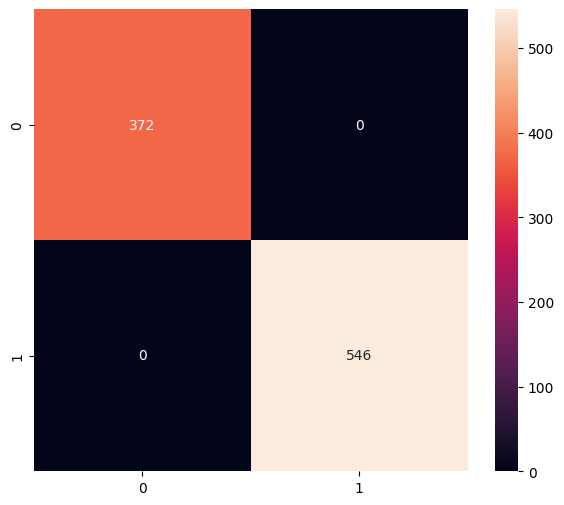

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00       546

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918



In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [100]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [101]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/82/6d45jxmx7dv9k2cnwz70lq2c0000gn/T/tmph9htti3d/assets


INFO:tensorflow:Assets written to: /var/folders/82/6d45jxmx7dv9k2cnwz70lq2c0000gn/T/tmph9htti3d/assets


Saved artifact at '/var/folders/82/6d45jxmx7dv9k2cnwz70lq2c0000gn/T/tmph9htti3d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_7')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  14393530064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14393529104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14393524304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14393527184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14393524496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14393528528: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1746961404.357487 1430273 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746961404.357693 1430273 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1746961404.362271 1430273 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


6572

# Inference test

In [102]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/tobi/Documents/coe197z/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [103]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [104]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [105]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 164 μs, sys: 102 μs, total: 266 μs
Wall time: 210 μs


In [106]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9999964e-01 3.1662344e-07 1.0361696e-13 9.8715744e-11]
0
